This example shows a capacitive power supply with a post zener
half-rectification, a kind of transformless power supply. To go further
on this topic, you can read these design notes:

-   Transformerless Power Supply Design, Designer Circuits, LLC
-   Low-cost power supply for home appliances, STM, AN1476
-   Transformerless Power Supplies: Resistive and Capacitive, Microchip,
    AN954


In [ ]:


import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice import SpiceLibrary, Circuit, Simulator, plot
from PySpice.Unit import *


libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)




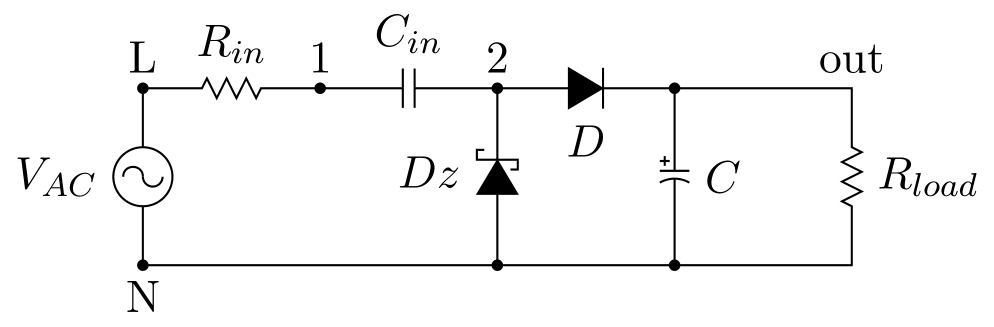

In [ ]:

circuit = Circuit('Capacitive Half-Wave Rectification (Post Zener)')

circuit.include(spice_library['1N4148'])
# 1N5919B: 5.6 V, 3.0 W Zener Diode Voltage Regulator
circuit.include(spice_library['d1n5919brl'])

ac_line = circuit.AcLine('input', 'L', circuit.gnd, rms_voltage=230@u_V, frequency=50@u_Hz)
circuit.R('in', 'L', 1, 470@u_Ω)
circuit.C('in', 1, 2, 470@u_nF)
# d1n5919brl pinning is anode cathode ->|-
circuit.X('Dz', 'd1n5919brl', circuit.gnd, 2)
# 1N4148 pinning is anode cathode ->|-
circuit.X('D', '1N4148', 2, 'out')
circuit.C('', 'out', circuit.gnd, 220@u_uF)
circuit.R('load', 'out', circuit.gnd, 1@u_kΩ)

# print circuit.nodes

# Simulator(circuit, ...).transient(...)
simulator = Simulator.factory()
simulation = simulator.simulation(circuit, temperature=25, nominal_temperature=25)
analysis = simulation.transient(step_time=ac_line.period/200, end_time=ac_line.period*10)

figure, ax = plt.subplots(figsize=(20, 10))

ax.plot(analysis['L'] / 100)
ax.plot(analysis.out)
###ax.plot((analysis.out - analysis['L']) / 100)
###ax.plot(analysis.out - analysis['2'])
###ax.plot((analysis['2'] - analysis['1']) / 100)
# or:
#   plt.ax.plot(analysis.out.abscissa, analysis.out)
ax.legend(('Vin [V]', 'Vout [V]'), loc=(.8,.8))
ax.grid()
ax.set_xlabel('t [s]')
ax.set_ylabel('[V]')

plt.tight_layout()
